In [1]:
import numpy as np

## Load Dataset

In [2]:
from keras.datasets import cifar10

((X_train, y_train), (X_test, y_test)) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### Visualize

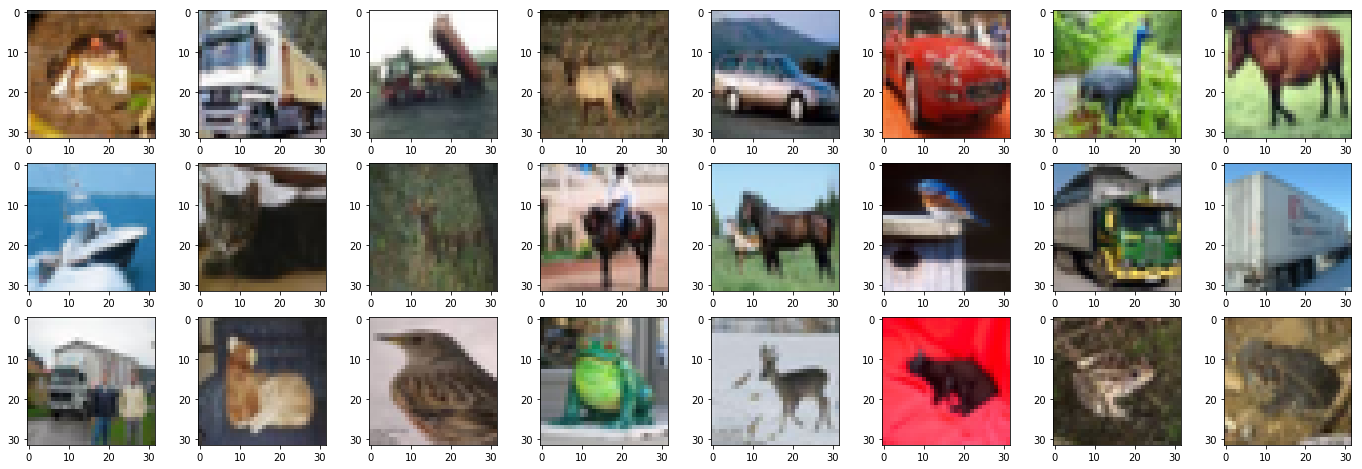

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=3, ncols=8)
figure.set_size_inches(24, 8)

for row in range(3):
    for col in range(8):
        axes[row][col].imshow(X_train[row * 8 + col])

## Preprocessing

In [4]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(50000, 10) (10000, 10)


In [5]:
X_train = X_train / 255
X_test = X_test / 255

### Build a Model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import SGD, rmsprop, Adam
from keras.initializers import RandomUniform

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=10,
                activation='sigmoid',
                kernel_initializer='glorot_uniform'))

opt = SGD(lr=0.01)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [7]:
model.fit(X_train,
          y_train_hot,
          epochs=30,
          shuffle=True,
          validation_data=(X_test, y_test_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 3200/50000 [>.............................] - ETA: 2:26 - loss: 2.2901 - acc: 0.1316

KeyboardInterrupt: 

### Evaluate

In [ ]:
import numpy as np

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

accuracy = (y_test.reshape(-1) == y_predict).mean()

print("Accuracy = {0:.5f}".format(accuracy))

In [ ]:
import pandas as pd

result = pd.DataFrame({'actual': y_test.reshape(-1), 'predict': y_predict})

label_list = result["actual"].unique()

for label in label_list:
    target = result[result["actual"] == label]
    
    per_accuracy = (target["actual"] == target["predict"]).mean()
    
    print(label, per_accuracy)